# 과제

## 행정 구역별 인구 변화 분석

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (32.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160975 files and di

***matplotlib 그래프 legend에서 한글이 깨지므로 위의 코드 실행 후 런타임 다시 시작하고 아래코드 하나하나 실행하기..!***

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.figsize'] = 15,10

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn]))) import io
df = pd.read_csv(io.StringIO(uploaded['행정구역_시군구_별__성별_인구수_2011_2020.csv'].decode('cp949')), header = [0,1], index_col = 0, dtype = str)
df

Saving 행정구역_시군구_별__성별_인구수_2011_2020.csv to 행정구역_시군구_별__성별_인구수_2011_2020 (2).csv
User uploaded file "행정구역_시군구_별__성별_인구수_2011_2020.csv" with length 1725 bytes


행정구역(시군구)별  2020. 11                      ...  2021. 01                    
행정구역(시군구)별  총인구수 (명) 남자인구수 (명) 여자인구수 (명)  ...  총인구수 (명) 남자인구수 (명) 여자인구수 (명)
전국          51834302  25844667  25989635  ...  51825932  25838512  25987420
서울특별시        9679771   4708321   4971450  ...   9657969   4695999   4961970
부산광역시        3395514   1663055   1732459  ...   3389388   1659527   1729861
대구광역시        2421859   1195081   1226778  ...   2415813   1191656   1224157
인천광역시        2942307   1473795   1468512  ...   2942452   1473639   1468813
광주광역시        1451993    718370    733623  ...   1449115    716929    732186
대전광역시        1465893    731701    734192  ...   1463291    730396    732895
울산광역시        1137345    584305    553040  ...   1135370    583402    551968
세종특별자치시       353430    176336    177094  ...    357871    178656    179215
경기도         13413459   6748061   6665398  ...  13449499   6765862   6683637
강원도          1542374    776079    766295  ...   1541696    775727    765969
충청북도         1599680    810903    788777  ...   1599658    811057    788601
충청남도         2120607   1082311   1038296  ...   2119837   1082095   1037742
전라북도         1805204    897393    907811  ...   1802748    896115    906633
전라남도         1850557    929986    920571  ...   1850575    930132    920443
경상북도         2639245   1328939   1310306  ...   2637639   1328384   1309255
경상남도         3341063   1681719   1659344  ...   3338396   1680383   1658013
제주특별자치도       674001    338312    335689  ...    674615    338553    336062

[18 rows x 9 columns]

In [ ]:
# 멀티 칼럼들에 공백과 '(명)' 문자를 제거 필요
# 칼럼 출력
for _ in df.columns :
  print(_)

('2020. 11', '총인구수 (명)')
('2020. 11', '남자인구수 (명)')
('2020. 11', '여자인구수 (명)')
('2020. 12', '총인구수 (명)')
('2020. 12', '남자인구수 (명)')
('2020. 12', '여자인구수 (명)')
('2021. 01', '총인구수 (명)')
('2021. 01', '남자인구수 (명)')
('2021. 01', '여자인구수 (명)')


In [ ]:
# 칼럼들에 존재하는 문자들은 모두 클린징하여 봄
for x in df.columns :
  print([_.replace(' ','').replace('(명)','') for _ in x])

['2020.11', '총인구수']
['2020.11', '남자인구수']
['2020.11', '여자인구수']
['2020.12', '총인구수']
['2020.12', '남자인구수']
['2020.12', '여자인구수']
['2021.01', '총인구수']
['2021.01', '남자인구수']
['2021.01', '여자인구수']


In [ ]:
# df.rename(columns = {'옛이름' : '신이름' , ...})에 사용될 딕셔너리 생성
colset=  {}
for x in df.columns :
  y = [_.replace(' ','').replace('(명)','')for _ in x]
  colset[x] = tuple(y)
colset

{('2020. 11', '남자인구수 (명)'): ('2020.11', '남자인구수'),
 ('2020. 11', '여자인구수 (명)'): ('2020.11', '여자인구수'),
 ('2020. 11', '총인구수 (명)'): ('2020.11', '총인구수'),
 ('2020. 12', '남자인구수 (명)'): ('2020.12', '남자인구수'),
 ('2020. 12', '여자인구수 (명)'): ('2020.12', '여자인구수'),
 ('2020. 12', '총인구수 (명)'): ('2020.12', '총인구수'),
 ('2021. 01', '남자인구수 (명)'): ('2021.01', '남자인구수'),
 ('2021. 01', '여자인구수 (명)'): ('2021.01', '여자인구수'),
 ('2021. 01', '총인구수 (명)'): ('2021.01', '총인구수')}

In [ ]:
# 데이터프레임의 level2의 멀티 칼럼을 level 1로 변경(튜플 지정)
df.columns = df.columns.values
df[df.columns] = df[df.columns].astype(int)
df

,"(2020. 11, 총인구수 (명))","(2020. 11, 남자인구수 (명))","(2020. 11, 여자인구수 (명))","(2020. 12, 총인구수 (명))","(2020. 12, 남자인구수 (명))","(2020. 12, 여자인구수 (명))","(2021. 01, 총인구수 (명))","(2021. 01, 남자인구수 (명))","(2021. 01, 여자인구수 (명))"
전국,51834302,25844667,25989635,51829023,25841029,25987994,51825932,25838512,25987420
서울특별시,9679771,4708321,4971450,9668465,4701723,4966742,9657969,4695999,4961970
부산광역시,3395514,1663055,1732459,3391946,1661000,1730946,3389388,1659527,1729861
대구광역시,2421859,1195081,1226778,2418346,1193109,1225237,2415813,1191656,1224157
인천광역시,2942307,1473795,1468512,2942828,1473943,1468885,2942452,1473639,1468813
광주광역시,1451993,718370,733623,1450062,717348,732714,1449115,716929,732186
대전광역시,1465893,731701,734192,1463882,730699,733183,1463291,730396,732895
울산광역시,1137345,584305,553040,1136017,583708,552309,1135370,583402,551968
세종특별자치시,353430,176336,177094,355831,177568,178263,357871,178656,179215
경기도,13413459,6748061,6665398,13427014,6754469,6672545,13449499,6765862,6683637


In [ ]:
# 칼럼명 변경
df = df.rename(columns = colset)
df.head()

,"(2020.11, 총인구수)","(2020.11, 남자인구수)","(2020.11, 여자인구수)","(2020.12, 총인구수)","(2020.12, 남자인구수)","(2020.12, 여자인구수)","(2021.01, 총인구수)","(2021.01, 남자인구수)","(2021.01, 여자인구수)"
전국,51834302,25844667,25989635,51829023,25841029,25987994,51825932,25838512,25987420
서울특별시,9679771,4708321,4971450,9668465,4701723,4966742,9657969,4695999,4961970
부산광역시,3395514,1663055,1732459,3391946,1661000,1730946,3389388,1659527,1729861
대구광역시,2421859,1195081,1226778,2418346,1193109,1225237,2415813,1191656,1224157
인천광역시,2942307,1473795,1468512,2942828,1473943,1468885,2942452,1473639,1468813


In [ ]:
# 튜플 기준으로 멀티 헤더의 인덱스로 변경함
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

2020.11                      ...   2021.01                    
             총인구수     남자인구수     여자인구수  ...      총인구수     남자인구수     여자인구수
전국       51834302  25844667  25989635  ...  51825932  25838512  25987420
서울특별시     9679771   4708321   4971450  ...   9657969   4695999   4961970
부산광역시     3395514   1663055   1732459  ...   3389388   1659527   1729861
대구광역시     2421859   1195081   1226778  ...   2415813   1191656   1224157
인천광역시     2942307   1473795   1468512  ...   2942452   1473639   1468813
광주광역시     1451993    718370    733623  ...   1449115    716929    732186
대전광역시     1465893    731701    734192  ...   1463291    730396    732895
울산광역시     1137345    584305    553040  ...   1135370    583402    551968
세종특별자치시    353430    176336    177094  ...    357871    178656    179215
경기도      13413459   6748061   6665398  ...  13449499   6765862   6683637
강원도       1542374    776079    766295  ...   1541696    775727    765969
충청북도      1599680    810903    788777  ...   1599658    811057    788601
충청남도      2120607   1082311   1038296  ...   2119837   1082095   1037742
전라북도      1805204    897393    907811  ...   1802748    896115    906633
전라남도      1850557    929986    920571  ...   1850575    930132    920443
경상북도      2639245   1328939   1310306  ...   2637639   1328384   1309255
경상남도      3341063   1681719   1659344  ...   3338396   1680383   1658013
제주특별자치도    674001    338312    335689  ...    674615    338553    336062

[18 rows x 9 columns]

In [ ]:
# 시계열 형식으로 변경해야 데이터의 변화를 분석하기 쉬움
# .T를 통해 인덱스와 칼럼의 윛를 변경할 수 있음
tf = df.T
tf

전국    서울특별시    부산광역시  ...     경상북도     경상남도  제주특별자치도
2020.11 총인구수   51834302  9679771  3395514  ...  2639245  3341063   674001
        남자인구수  25844667  4708321  1663055  ...  1328939  1681719   338312
        여자인구수  25989635  4971450  1732459  ...  1310306  1659344   335689
2020.12 총인구수   51829023  9668465  3391946  ...  2639422  3340216   674635
        남자인구수  25841029  4701723  1661000  ...  1329211  1681423   338609
        여자인구수  25987994  4966742  1730946  ...  1310211  1658793   336026
2021.01 총인구수   51825932  9657969  3389388  ...  2637639  3338396   674615
        남자인구수  25838512  4695999  1659527  ...  1328384  1680383   338553
        여자인구수  25987420  4961970  1729861  ...  1309255  1658013   336062

[9 rows x 18 columns]

In [ ]:
# unstack()을 통해 멀티 인덱스 한 개를 칼럼 차원으로 재그룹핑
tf = tf.unstack()
tf

전국                        서울특별시  ...     경상남도 제주특별자치도                
            남자인구수     여자인구수      총인구수    남자인구수  ...     총인구수   남자인구수   여자인구수    총인구수
2020.11  25844667  25989635  51834302  4708321  ...  3341063  338312  335689  674001
2020.12  25841029  25987994  51829023  4701723  ...  3340216  338609  336026  674635
2021.01  25838512  25987420  51825932  4695999  ...  3338396  338553  336062  674615

[3 rows x 54 columns]

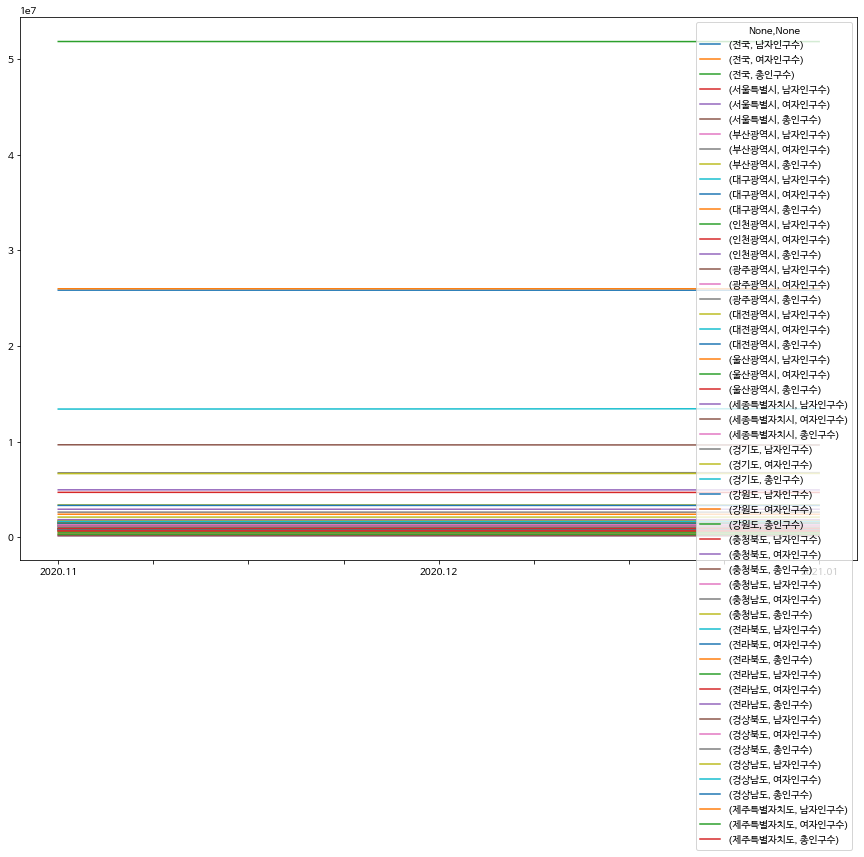

In [ ]:
# 인덱스가 x축, 나머지 값들이 Y축이 되어 출력됨
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.figsize'] = 15,10
tf.plot()

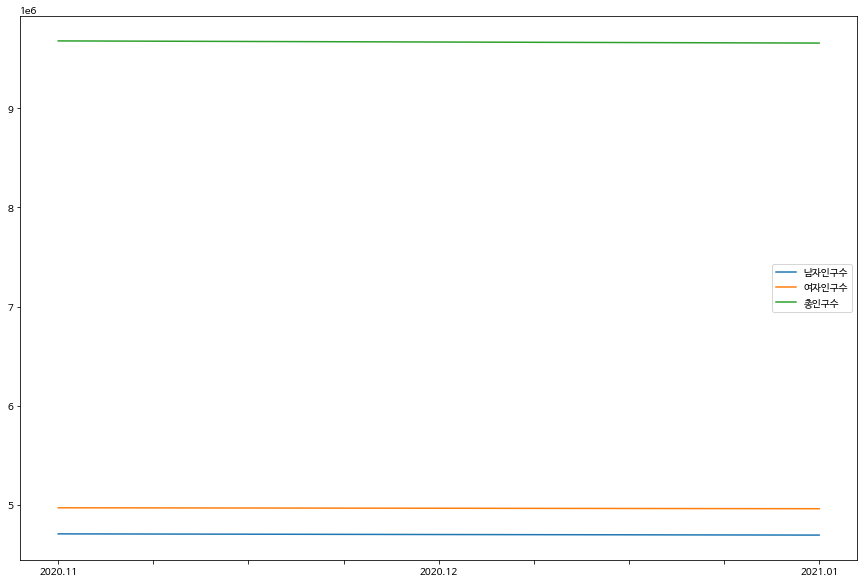

In [ ]:
# 서울특별시로 한정하여 출력
tf['서울특별시'].plot()

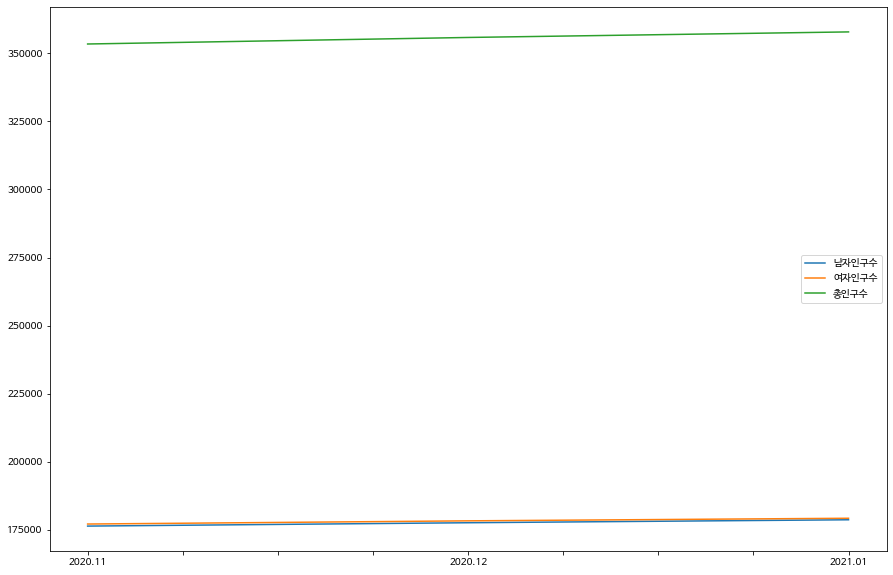

In [ ]:
# 세종특별자치시로 한정하여 출력
tf['세종특별자치시'].plot()